In [46]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

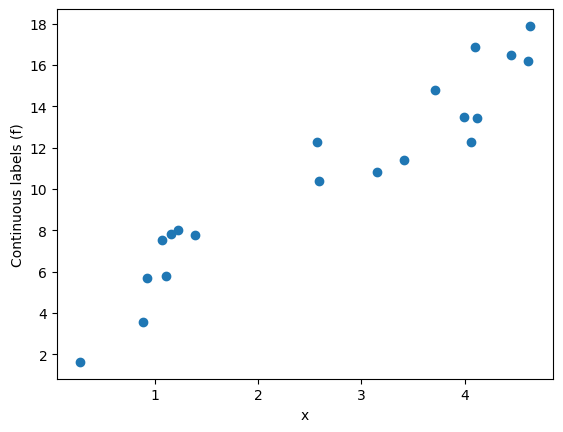

In [47]:
x = 5 * rng.random(20)
f = 3 * x + 5 * rng.random(20)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [48]:
X = np.array([np.ones(len(x)), x]).T
a = inv(X.T @ X) @ X.T @ f # Create the "model"

In [49]:
x_predict = np.linspace(0, 5, num=100)
f_predict = a[0] + a[1] * x_predict # "Predict" using the model

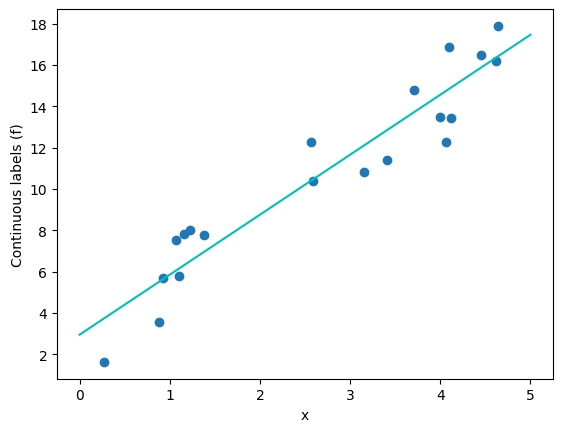

In [50]:
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)'); plt.plot(x_predict, f_predict, 'c');

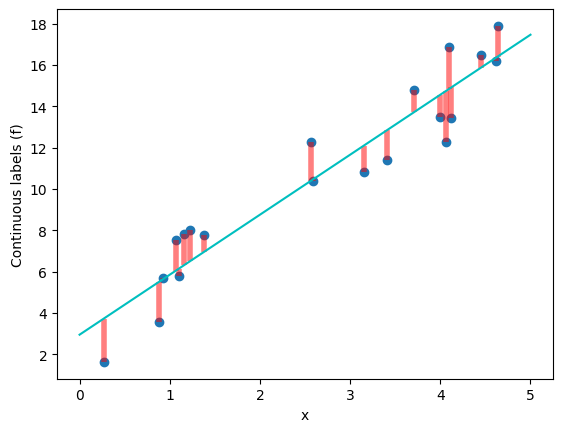

In [51]:
from matplotlib.collections import LineCollection
fp = X @ a
plt.scatter(x, f)
lc = LineCollection([[(x[i], f[i]), (x[i], fp[i])]for i in range(len(x))], color='r', linewidth=4,alpha=0.5)
plt.gca().add_collection(lc)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)'); plt.plot(x_predict, f_predict, 'c');

In [52]:
linear_example = {'data': [x, f], 'model': a}

In [53]:
x1 = 5 * rng.random(100)
x2 = 5 * rng.random(100)
f = 10 -(3*x1 + 2* x2 + 2 * rng.random(100))

In [54]:
X = np.array([np.ones(len(x1)), x1, x2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

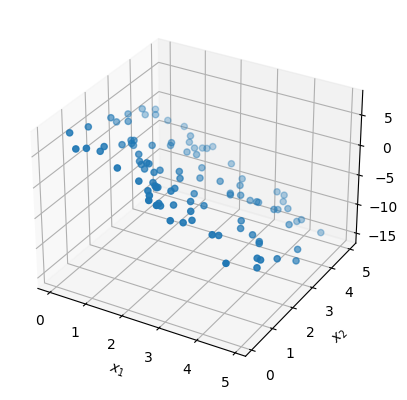

In [55]:
from mpl_toolkits.mplot3d import Axes3D
ax =plt.subplot(projection = '3d')
ax.scatter(x1, x2, f)
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

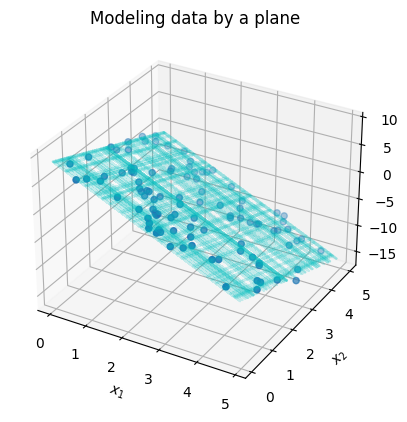

In [56]:
ax = plt.subplot(projection = '3d')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
xx1, xx2 = np.meshgrid(x1, x2)
zz = a[0] + a[1] * xx1 + a[2] * xx2
ax.plot_wireframe(xx1, xx2, zz, color='c', alpha=0.2)
ax.scatter(x1, x2, f); ax.set_title('Modeling data by a plane');

In [57]:
planar_example = {'data': [np.array([x1, x2]).T, f], 'model': a}


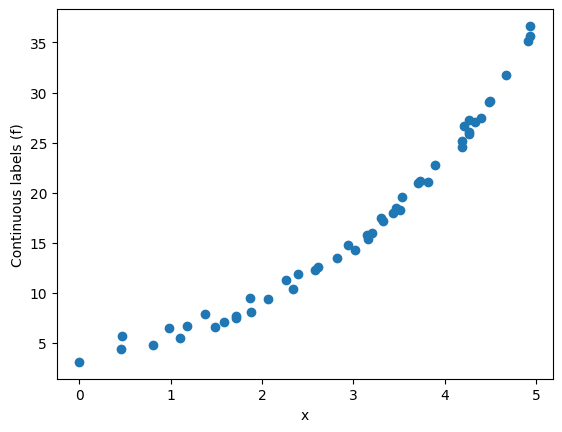

In [59]:
x = 5 * rng.random(50)
f = 3 * np.exp(x/2) + 2 * rng.random(50)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');


In [60]:
phi0 = np.ones(len(x))
phi1 = x
phi2 = x**2
X = np.array([phi0, phi1, phi2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

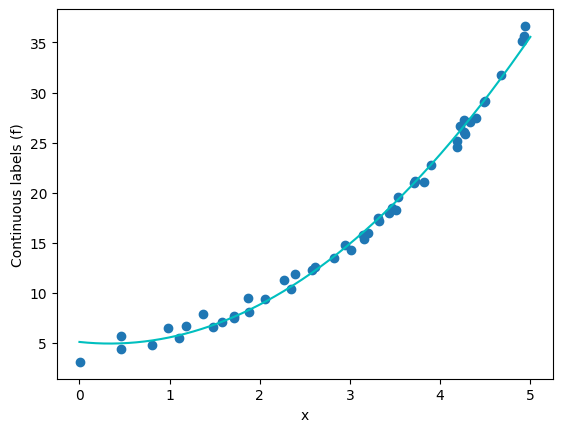

In [61]:
xcurve_predict = np.linspace(0, 5, num=500)
phi0 = np.ones(len(xcurve_predict))
phi1 = xcurve_predict
phi2 = xcurve_predict**2
fcurve_predict = a[0] * phi0 + a[1] * phi1 + a[2] * phi2
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)'); plt.plot(xcurve_predict, fcurve_predict, 'c');

In [62]:
curve_example = {'data': [x, f], 'model': a, 'type': 'quadratic'}

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [64]:
x, f = linear_example['data'] # Recall the saved data from the first␣ ↪→example
model.fit(x[:, np.newaxis], f) # Training step

LinearRegression()

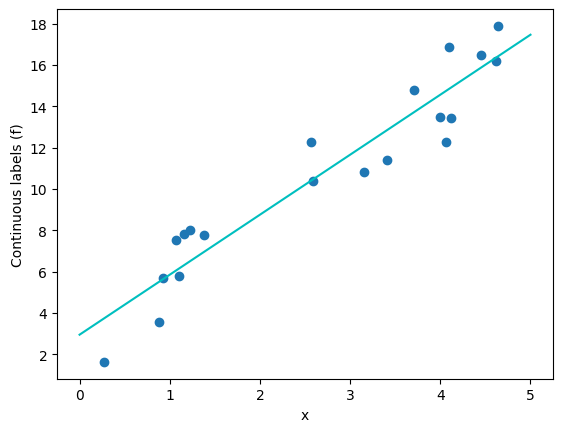

In [65]:
xfit = np.linspace(0, 5, num=100)
ffit = model.predict(xfit[:, np.newaxis]) # Prediction step
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)'); plt.plot(xfit, ffit, 'c');

In [66]:
model.intercept_, model.coef_

(2.9548137487468367, array([2.90310325]))

In [67]:
linear_example['model']

array([2.95481375, 2.90310325])

In [68]:
x12, f = planar_example['data']
model.fit(x12, f)

LinearRegression()

In [69]:
model.intercept_, model.coef_

(9.167204926561409, array([-3.03592026, -2.03048875]))

In [70]:
planar_example['model']

array([ 9.16720493, -3.03592026, -2.03048875])

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [72]:
q = PolynomialFeatures(3, include_bias=False)

In [73]:
data = np.array([5, 7, 9])[:, np.newaxis]
q.fit_transform(data)

array([[  5.,  25., 125.],
       [  7.,  49., 343.],
       [  9.,  81., 729.]])

In [74]:
x, y = curve_example['data'] # load data from the prior example # make model/pipeline and fit the data to it:
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

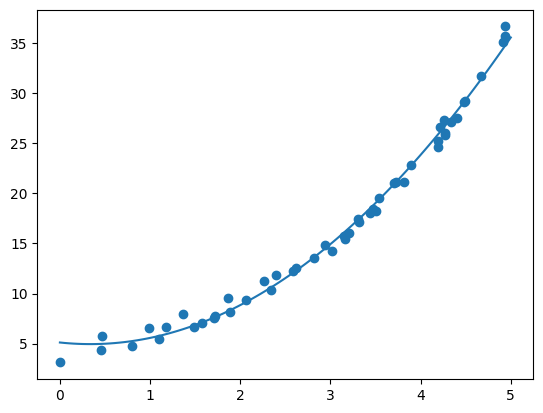

In [75]:
yfit = quadratic_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [76]:
quadratic_model.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression()}

In [77]:
quadratic_model.named_steps['linearregression'].intercept_

5.109814408527011

In [79]:
quadratic_model.named_steps['linearregression'].coef_


array([ 0.        , -0.95003115,  1.40797258])

In [80]:
curve_example['model'] # previously saved results from first principles

array([ 5.10981441, -0.95003115,  1.40797258])